<>:17: SyntaxWarning: invalid escape sequence '\i'
<>:17: SyntaxWarning: invalid escape sequence '\i'
C:\Users\kelvi\AppData\Local\Temp\ipykernel_24560\1110146756.py:17: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('dataset_injury\injury_data.csv')


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,28.23,74.79,179.75,0.52,0.49,3.47,0.50
std,6.54,9.89,9.89,0.50,0.29,1.70,0.50
min,18.00,40.19,145.29,0.00,0.00,1.00,0.00
25%,22.00,67.95,173.03,0.00,0.24,2.00,0.00
50%,28.00,75.02,180.03,1.00,0.48,4.00,0.50
75%,34.00,81.30,186.56,1.00,0.73,5.00,1.00
max,39.00,104.65,207.31,1.00,1.00,6.00,1.00


Player Age Min: 18
Player Age Max: 39


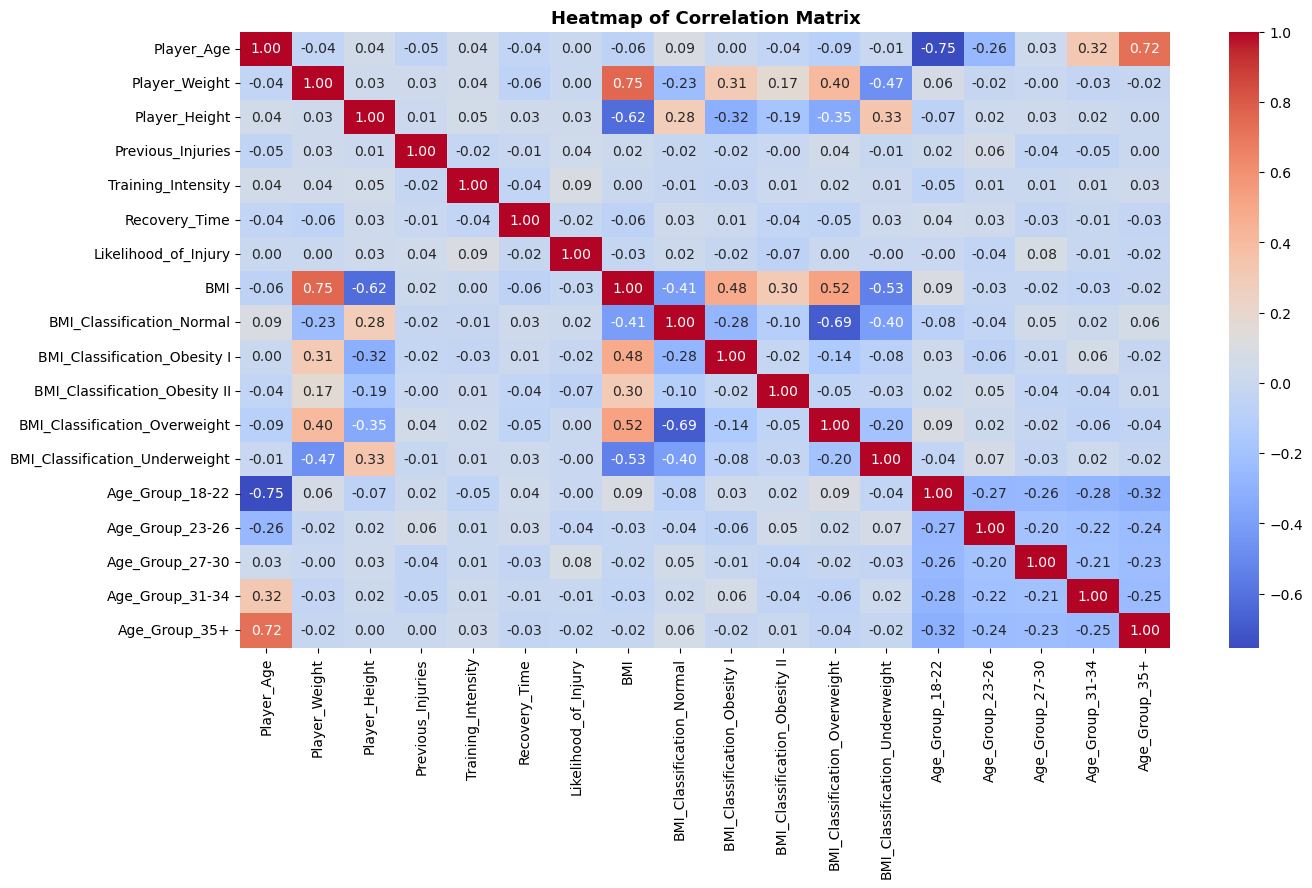

C:\Users\kelvi\AppData\Local\Temp\ipykernel_24560\1110146756.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_likelihood.index, y=correlation_with_likelihood.values, palette='coolwarm')


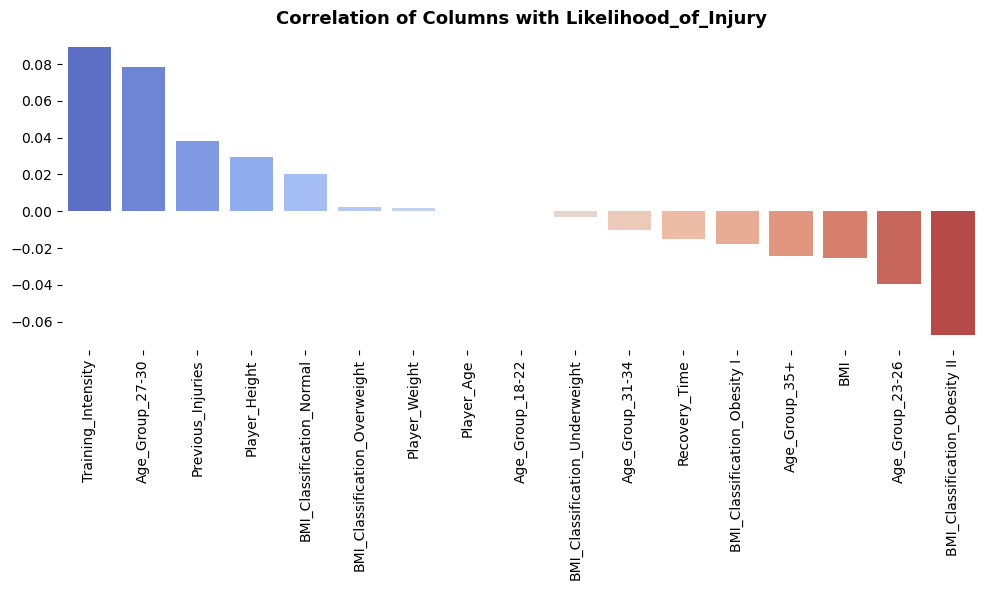

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 441, number of negative: 459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490000 -> initscore=-0.040005
[LightGBM] [Info] Start training from score -0.040005
Model: LGBMClassifier
Recall: 0.5423728813559322
Accuracy: 0.61
Precision: 0.7272727272727273
--------------------------------------------------


c:\Users\kelvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Recall: 0.576271186440678
Accuracy: 0.6
Precision: 0.6938775510204082
--------------------------------------------------
Model: ExtraTreesClassifier
Recall: 0.5084745762711864
Accuracy: 0.56
Precision: 0.6666666666666666
--------------------------------------------------
Model: NuSVC
Recall: 0.8135593220338984
Accuracy: 0.59
Precision: 0.6153846153846154
--------------------------------------------------
Model: ExtraTreeClassifier
Recall: 0.559322033898305
Accuracy: 0.54
Precision: 0.6226415094339622
--------------------------------------------------


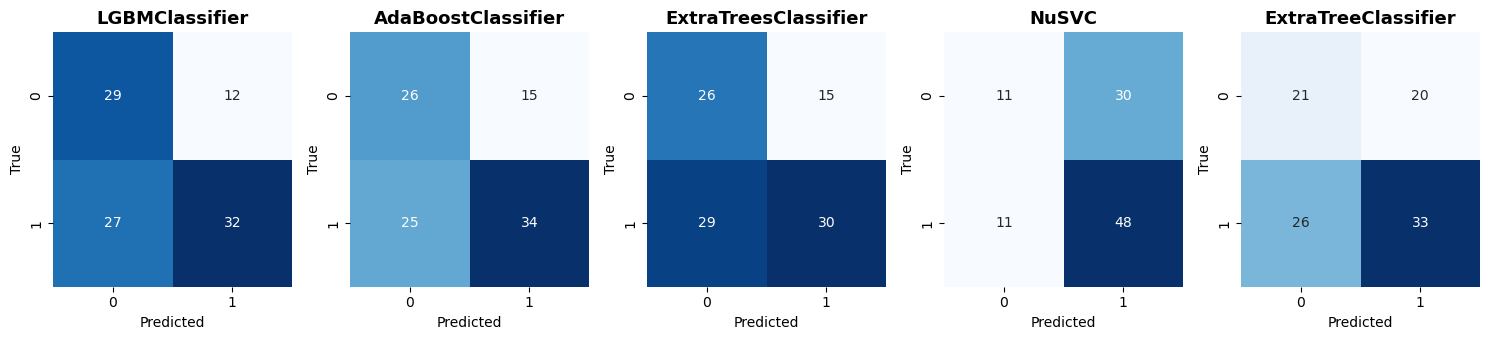

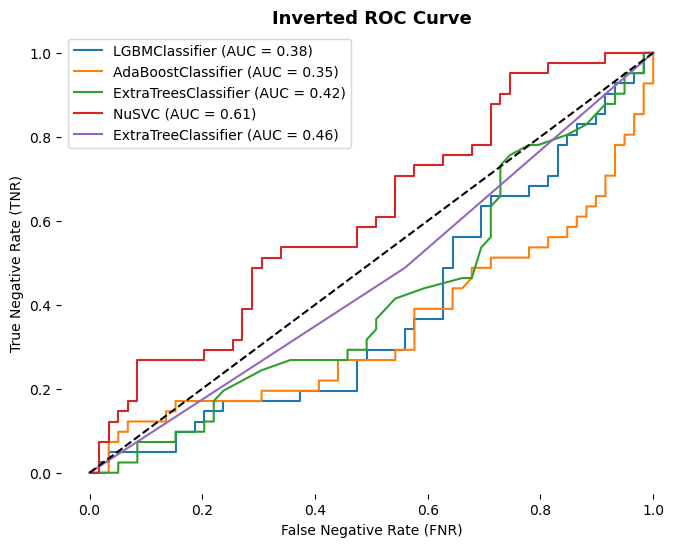

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import NuSVC
from sklearn.tree import ExtraTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
df = pd.read_csv('dataset_injury\injury_data.csv')
df['Player_Weight'] = df['Player_Weight'].round(2)
df['Player_Height'] = df['Player_Height'].round(2)
df['Training_Intensity'] = df['Training_Intensity'].round(2)
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())
    # Calculate the Body Mass Index (BMI) | Calcular o Índice de Massa Corporal (IMC)
df['BMI'] = df['Player_Weight'] / (df['Player_Height'] / 100) ** 2

# Defining gaps for BMI classification | Definir os intervalos para classificação do IMC
gaps = [-float('inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
categories = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

# Create "BMI_Classification" column | Criar a coluna "Classificação_IMC"
df['BMI_Classification'] = pd.cut(df['BMI'], bins=gaps, labels=categories, right=False)

print('Player Age Min: {}'.format(df.Player_Age.min()))
print('Player Age Max: {}'.format(df.Player_Age.max()))
df["Age_Group"] = pd.cut(
    df["Player_Age"],
    bins=[18, 22, 26, 30, 34, df["Player_Age"].max()],
    labels=["18-22", "23-26", "27-30", "31-34", "35+"],
    include_lowest=True,
)
# Categorical columns
one_hot_cols = [
    "BMI_Classification",
    "Age_Group",
]

# Selecting only categorical columns from the DataFrame | Selecionando apenas as colunas categóricas do DataFrame
df_categorical = df[one_hot_cols]

# Applying OneHotEncoder | Aplicando o OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

# Obtaining names of the features generated by OneHotEncoder | Obtendo os nomes das features geradas pelo OneHotEncoder
one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

# Joining DataFrames | Juntar os DataFrames
df_final = pd.concat([df, df_encoded], axis=1)

# Dropping categorical columns | Excluindo colunas categóricas
df_final.drop(columns=['BMI_Classification', 'Age_Group'], inplace=True)
# Calculating correlation matrix | Calculando a matriz de correlação
correlation_matrix = df_final.corr()

# Plotting heatmap | Plotando o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix', weight='bold', size=13)
plt.show()
# Calculating correlation matrix | Calcular a matriz de correlação
correlation_matrix = df_final.corr()

# Selecting only 'Likelihood_of_Injury' column from the correlation matrix | Selecionar apenas a coluna 'Likelihood_of_Injury' da matriz de correlação
correlation_with_likelihood = correlation_matrix['Likelihood_of_Injury']

# Removing the correlation with the 'Likelihood_of_Injury' column | Remover a correlação com a coluna 'Likelihood_of_Injury'
correlation_with_likelihood = correlation_with_likelihood.drop('Likelihood_of_Injury')

# Sorting correlations in descending order | Ordenar as correlações em ordem decrescente
correlation_with_likelihood = correlation_with_likelihood.sort_values(ascending=False)

# Plotting correlation bar plot | Plotar o gráfico de barras de correlação
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_likelihood.index, y=correlation_with_likelihood.values, palette='coolwarm')
plt.xticks(rotation=90, ha='center')  
plt.xlabel('')
plt.ylabel('')
plt.box(False) 
plt.title('Correlation of Columns with Likelihood_of_Injury', weight='bold', size=13)
plt.tight_layout()
plt.show()
# Drop columns starting with "Age_Group" | Excluir colunas que começa com "Age_Group"
df_final = df_final.loc[:, ~df_final.columns.str.startswith('Age_Group')]

# Drop BMI column | Excluir a coluna BMI
df_final = df_final.drop(columns=['BMI'])
# Features
X = df_final.drop('Likelihood_of_Injury', axis=1)

# Target variable | Variável alvo
y = df_final['Likelihood_of_Injury']

# Split data into training and testing sets | Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Dictionary models | Dicionário de modelos
models = {
    "LGBMClassifier": LGBMClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "NuSVC": NuSVC(probability=True),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    }
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)
    # Create figure and axes
fig, axes = plt.subplots(1, len(models), figsize=(15, 3.5))

# Plot confusion matrix for each model
for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"{model_name}", weight='bold', size=13)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Adjust layout and show figure
plt.tight_layout()
plt.show()
# Plot Inverted ROC Curve
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 0]  # Probabilities of belonging to the negative class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    tnr = 1 - fpr  # True Negative Rate (TNR)
    fnr = 1 - tpr  # False Negative Rate (FNR)
    
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fnr, tnr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Negative Rate (FNR)')
plt.ylabel('True Negative Rate (TNR)')
plt.title('Inverted ROC Curve', weight='bold', size=13)
plt.legend()
plt.box(False)  # Remove plot borders
plt.show()
# Visualizing the first few rows of the final DataFrame | Visualizar as primeiras linhas do DataFrame final
# df_final.head()

In [24]:
print(X_train.columns)
print(X_train.shape[1])
print(X_train.head(1))

Index(['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
       'Training_Intensity', 'Recovery_Time', 'BMI_Classification_Normal',
       'BMI_Classification_Obesity I', 'BMI_Classification_Obesity II',
       'BMI_Classification_Overweight', 'BMI_Classification_Underweight'],
      dtype='object')
11
     Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
716          39          75.51         190.87                  1   

     Training_Intensity  Recovery_Time  BMI_Classification_Normal  \
716                0.91              5                        1.0   

     BMI_Classification_Obesity I  BMI_Classification_Obesity II  \
716                           0.0                            0.0   

     BMI_Classification_Overweight  BMI_Classification_Underweight  
716                            0.0                             0.0  


In [6]:
# Generate random data with the same structure as the training data
random_data = pd.DataFrame(np.random.rand(10, X_train.shape[1]), columns=X_train.columns)

# Use the trained AdaBoostClassifier model to predict injury likelihood on random data
random_predictions = models['AdaBoostClassifier'].predict(random_data)

# Print the random data and the corresponding predictions
print("Random Data:")
print(random_data)
print("\nPredictions:")
print(random_predictions)
# Calculate accuracy of the model on random data
random_accuracy = accuracy_score(np.random.randint(0, 2, size=random_predictions.shape), random_predictions)

print("\nRandom Data Accuracy:")
print(random_accuracy)

Random Data:
   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0    0.160991       0.854907       0.571718           0.218790   
1    0.751367       0.571231       0.005737           0.355831   
2    0.159934       0.408362       0.089786           0.159960   
3    0.446450       0.225981       0.535416           0.314851   
4    0.214487       0.476768       0.557004           0.217883   
5    0.175079       0.410983       0.746155           0.892081   
6    0.930646       0.727258       0.038893           0.043352   
7    0.978822       0.977435       0.617104           0.249992   
8    0.441313       0.062605       0.487184           0.844197   
9    0.049769       0.262639       0.246026           0.921754   

   Training_Intensity  Recovery_Time  BMI_Classification_Normal  \
0            0.569766       0.468156                   0.176539   
1            0.492053       0.510893                   0.451266   
2            0.525666       0.042080                   0.88

In [7]:
X_train.columns

Index(['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
       'Training_Intensity', 'Recovery_Time', 'BMI_Classification_Normal',
       'BMI_Classification_Obesity I', 'BMI_Classification_Obesity II',
       'BMI_Classification_Overweight', 'BMI_Classification_Underweight'],
      dtype='object')

In [8]:
df_fifa = pd.read_csv('dataset_fifa\players_20.csv')
df_fifa = df_fifa.dropna()

df_fifa.columns

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kelvi\AppData\Local\Temp\ipykernel_24560\2444642710.py:1: SyntaxWarning: invalid escape sequence '\p'
  df_fifa = pd.read_csv('dataset_fifa\players_20.csv')


Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [9]:
df_fifa_new = df_fifa.drop(columns=['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb','club_team_id', 'club_name',
       'league_name', 'league_level', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined', 'club_contract_valid_until','nationality_id', 'nationality_name', 'nation_team_id',
       'nation_position', 'nation_jersey_number',
       'lb'])

In [10]:
df_fifa_new.head()

,age,dob,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed


In [11]:
df = df_fifa_new
df.head()

,age,dob,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed


In [12]:
# import pandas as pd
df = pd.read_csv('dataset_fifa\players_20.csv')
# Assuming df is your dataframe
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2

# Stamina Score (combining power_stamina, movement_sprint_speed, and power_strength)
df['stamina_score'] = (df['power_stamina'] + df['movement_sprint_speed'] + df['power_strength']) / 3

# Injury Risk (based on mentality_aggression, power_strength, and physic)
df['injury_risk'] = ((df['mentality_aggression'] - df['power_strength']) + (100 - df['physic'])) / 2

# Training Intensity (based on skill_moves, work_rate, and power_stamina)
# df['training_intensity'] = (df['skill_moves'] + df['work_rate'] + df['power_stamina']) / 3

# Recovery Time (based on power_stamina, power_jumping, and movement_reactions)
df['recovery_time'] = 100 - (df['power_stamina'] + df['power_jumping'] + df['movement_reactions']) / 3

# Display the computed values
print(df[['BMI', 'stamina_score', 'injury_risk', 'recovery_time']].head(10))


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kelvi\AppData\Local\Temp\ipykernel_24560\2848636617.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('dataset_fifa\players_20.csv')


         BMI  stamina_score  injury_risk  recovery_time
0  24.913495      75.666667          7.0      20.666667
1  23.735308      84.666667          3.5       8.000000
2  22.204082      73.000000         22.0      22.000000
3  24.163265      78.333333         12.5      23.333333
4  21.366869      79.666667         12.0      19.000000
5  24.615211      59.666667          NaN      31.000000
6  22.309356      71.333333         19.0      19.333333
7  24.307244      54.333333          NaN      33.333333
8  24.698650      82.000000          2.0      15.666667
9  23.183673      83.333333          8.0      18.000000


In [13]:
# df['training_intensity'] = (df['skill_moves'] + df['work_rate'] + df['power_stamina']) / 3
df['work_rate'].head()

0     Medium/Low
1       High/Low
2    High/Medium
3    High/Medium
4      High/High
Name: work_rate, dtype: object

In [14]:
import pandas as pd

# Define a mapping for work_rate
work_rate_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Function to convert work_rate into numerical score
def work_rate_to_numeric(work_rate):
    offensive, defensive = work_rate.split('/')
    return (work_rate_mapping[offensive.strip()] + work_rate_mapping[defensive.strip()]) / 2

# Apply the function to the 'work_rate' column
df['work_rate_numeric'] = df['work_rate'].apply(work_rate_to_numeric)

# Calculate BMI
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2

# Stamina Score (combining power_stamina, movement_sprint_speed, and power_strength)
df['stamina_score'] = (df['power_stamina'] + df['movement_sprint_speed'] + df['power_strength']) / 3

# Injury Risk (based on mentality_aggression, power_strength, and physic)
df['injury_risk'] = ((df['mentality_aggression'] - df['power_strength']) + (100 - df['physic'])) / 2

# Training Intensity (based on skill_moves, work_rate_numeric, and power_stamina)
df['training_intensity'] = (df['skill_moves'] + df['work_rate_numeric'] + df['power_stamina']) / 3

# Recovery Time (based on power_stamina, power_jumping, and movement_reactions)
df['recovery_time'] = 100 - (df['power_stamina'] + df['power_jumping'] + df['movement_reactions']) / 3

# Display the computed values
print(df[['BMI', 'stamina_score', 'injury_risk', 'training_intensity', 'recovery_time']].head())


         BMI  stamina_score  injury_risk  training_intensity  recovery_time
0  24.913495      75.666667          7.0           26.833333      20.666667
1  23.735308      84.666667          3.5           30.666667       8.000000
2  22.204082      73.000000         22.0           29.500000      22.000000
3  24.163265      78.333333         12.5           30.166667      23.333333
4  21.366869      79.666667         12.0           32.000000      19.000000


In [15]:
df_sorted_injury = df[['injury_risk']].sort_values(by='injury_risk', ascending=True)
print(df_sorted_injury.head())

       injury_risk
8944         -15.5
16510        -14.5
4099         -14.0
3664         -13.5
8454         -13.0


In [16]:
df_sorted_injury = df[['injury_risk']].sort_values(by='injury_risk', ascending=False)
print(df_sorted_injury.head())

       injury_risk
1994          51.0
17612         49.0
15949         46.5
7730          46.5
4557          46.0


In [17]:
df['injury_risk'].mean()

14.386158811350628

In [18]:
# Create a new column 'Previous_Injuries' with 1 for injury_risk > 35, otherwise 0
df['Previous_Injuries'] = (df['injury_risk'] > 35).astype(int)

# Display the dataframe with the new column
print(df[['injury_risk', 'Previous_Injuries']].sort_values(by='injury_risk', ascending=False).head())


       injury_risk  Previous_Injuries
1994          51.0                  1
17612         49.0                  1
15949         46.5                  1
7730          46.5                  1
4557          46.0                  1


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your existing dataframe

# Step 1: Renaming the relevant columns
df.rename(columns={
    'age': 'Player_Age',
    'weight_kg': 'Player_Weight',
    'height_cm': 'Player_Height',
    'Previous_Injuries': 'Previous_Injuries',
    'training_intensity': 'Training_Intensity',
    'recovery_time': 'Recovery_Time',
}, inplace=True)

# Step 2: Classifying BMI
# Defining the gaps for BMI classification
gaps = [-float('inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
categories = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

# Create "BMI_Classification" column
df['BMI_Classification'] = pd.cut(df['BMI'], bins=gaps, labels=categories, right=False)

# Step 3: Adding age groups
df["Age_Group"] = pd.cut(
    df["Player_Age"],
    bins=[18, 22, 26, 30, 34, df["Player_Age"].max()],
    labels=["18-22", "23-26", "27-30", "31-34", "35+"],
    include_lowest=True
)

# Step 4: One-hot encoding for 'BMI_Classification' and 'Age_Group'
one_hot_cols = ["BMI_Classification", "Age_Group"]

# Selecting only categorical columns
df_categorical = df[one_hot_cols]

# Applying OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

# Obtaining names of the features generated by OneHotEncoder
one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

# Step 5: Joining the encoded columns back into the original DataFrame
df_final = pd.concat([df, df_encoded], axis=1)

# Step 6: Ensuring all required columns are present, even if some categories are missing
required_columns = [
    'Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
    'Training_Intensity', 'Recovery_Time', 'BMI_Classification_Normal',
    'BMI_Classification_Obesity I', 'BMI_Classification_Obesity II',
    'BMI_Classification_Overweight', 'BMI_Classification_Underweight'
]

# If a column is missing, add it and fill with zeros
for col in required_columns:
    if col not in df_final.columns:
        df_final[col] = np.zeros(len(df_final))

# Step 7: Selecting the final columns in the order you specified
df_final = df_final[required_columns]

# Displaying the first row of the final DataFrame
print(df_final.head(1))


   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0          32             72            170                  0   

   Training_Intensity  Recovery_Time  BMI_Classification_Normal  \
0           26.833333      20.666667                        0.0   

   BMI_Classification_Obesity I  BMI_Classification_Obesity II  \
0                           0.0                            0.0   

   BMI_Classification_Overweight  BMI_Classification_Underweight  
0                            1.0                             0.0  


In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example: Columns used for training (ensure these are the same as used in your training phase)
trained_feature_names = [
    'Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
    'Training_Intensity', 'Recovery_Time',
    'BMI_Classification_Normal', 'BMI_Classification_Obesity I',
    'BMI_Classification_Obesity II', 'BMI_Classification_Overweight',
    'BMI_Classification_Underweight'
]
for col in trained_feature_names:
    if col not in df.columns:
        df[col] = 0  # or appropriate default value

# Ensure the columns are in the correct order
df = df[trained_feature_names]

# Use the trained AdaBoostClassifier model to predict injury likelihood
df['Likelihood_of_Injury'] = models['AdaBoostClassifier'].predict(df)

# Display the updated DataFrame with the new column
# print(df[['sofiya', 'Player_Weight', 'Likelihood_of_Injury']].head())

# Make sure your DataFrame contains these columns in the same order
# # Create an empty DataFrame with these columns to ensure the order
# df_for_prediction = pd.DataFrame(columns=trained_feature_names)

# # Fill the DataFrame with the relevant data, ensuring columns match
# df_for_prediction[trained_feature_names] = df[trained_feature_names]

# # Predict using the trained model
# df['Likelihood_of_Injury'] = models['AdaBoostClassifier'].predict(df_for_prediction)

# # Display the updated DataFrame with the new column
# print(df[['Player_Age', 'Player_Weight', 'Likelihood_of_Injury']].head())


In [21]:
%pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [22]:

%pip install shap




Note: you may need to restart the kernel to use updated packages.


In [23]:
import shap

# Ensure models['AdaBoostClassifier'] is a trained AdaBoost classifier
model = models['AdaBoostClassifier']

# Ensure df is your feature data (without target labels)
df = df  # Replace this with your actual dataframe

# Create a SHAP explainer for AdaBoostClassifier
explainer = shap.Explainer(model)

# Compute SHAP values
shap_values = explainer(df)

# Generate a summary plot
shap.summary_plot(shap_values, df)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: AdaBoostClassifier()